<h2 style="color:purple">Student Performance analysis

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline()

In [167]:
df=pd.read_csv('student-per.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [168]:
#check the type of data
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [169]:
#importing padas profilling to get insight of the data
import pandas_profiling as pp
profile=pp.ProfileReport(df)
profile.to_file('dataDescription.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<h4>From pandas profilling report we can conclude that <br>
    1.Data set doesnot contain null values<br>
    2.Data set doesnot contain duplicate values<br>
    3.Data set is clean 

In [170]:
#exploring the unique values in the data set
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

<h4> Observation<br>
1.There are 2 categorical data<br>
2.There are more than two categorical data. In data columns with more than 2 categorical data we
 can get more insight by visualising the data

In [171]:
#Encoding the 2 catogorical data 

In [172]:
columns=list(df.columns)
lst=[]
for i in columns:
    if df[i].nunique()==2:
        lst.append(i)
lst

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [173]:
df[lst]

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,no,yes,no,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,no,no,no,yes,no,yes,yes,no
645,MS,F,U,LE3,T,no,yes,no,no,yes,yes,yes,no
646,MS,F,U,GT3,T,no,no,no,yes,yes,yes,no,no
647,MS,M,U,LE3,T,no,no,no,no,no,yes,yes,no


In [174]:
df[lst]=df[lst].replace({'yes':1,'no':0})
df[lst]

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,1,0,0,0,1,1,0,0
1,GP,F,U,GT3,T,0,1,0,0,0,1,1,0
2,GP,F,U,LE3,T,1,0,0,0,1,1,1,0
3,GP,F,U,GT3,T,0,1,0,1,1,1,1,1
4,GP,F,U,GT3,T,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,0,0,0,1,0,1,1,0
645,MS,F,U,LE3,T,0,1,0,0,1,1,1,0
646,MS,F,U,GT3,T,0,0,0,1,1,1,0,0
647,MS,M,U,LE3,T,0,0,0,0,0,1,1,0


In [175]:
#desciption of the data sets

In [176]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,0.104777,0.613251,0.060092,0.485362,...,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.306502,0.487381,0.237841,0.500171,...,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [177]:
#printing the standard deviation

In [178]:
df.describe().iloc[2]

age           1.218138
Medu          1.134552
Fedu          1.099931
traveltime    0.748660
studytime     0.829510
failures      0.593235
schoolsup     0.306502
famsup        0.487381
paid          0.237841
activities    0.500171
nursery       0.398212
higher        0.308481
internet      0.422857
romantic      0.482704
famrel        0.955717
freetime      1.051093
goout         1.175766
Dalc          0.924834
Walc          1.284380
health        1.446259
absences      4.640759
G1            2.745265
G2            2.913639
G3            3.230656
Name: std, dtype: float64

<h4> Observations from standard deviation<br>
    1.In absences column outliers are observed. Which means that some students are absent for a very long time<br>
    2.Standard deviation of age is 1.21.. implies that outliers are present in age column too

In [179]:
#barplot for age column
fig = px.box(df, y="age")
fig.show()

<h4>Outliers in age column is confirmed from the boxplot

In [180]:
#boxplot for the absences columns
fig = px.box(df, y="absences")
fig.show()

<h4> Outliers in age column is confirmed from the boxplot

In [181]:
#visualising the data using heatmap

<AxesSubplot:>

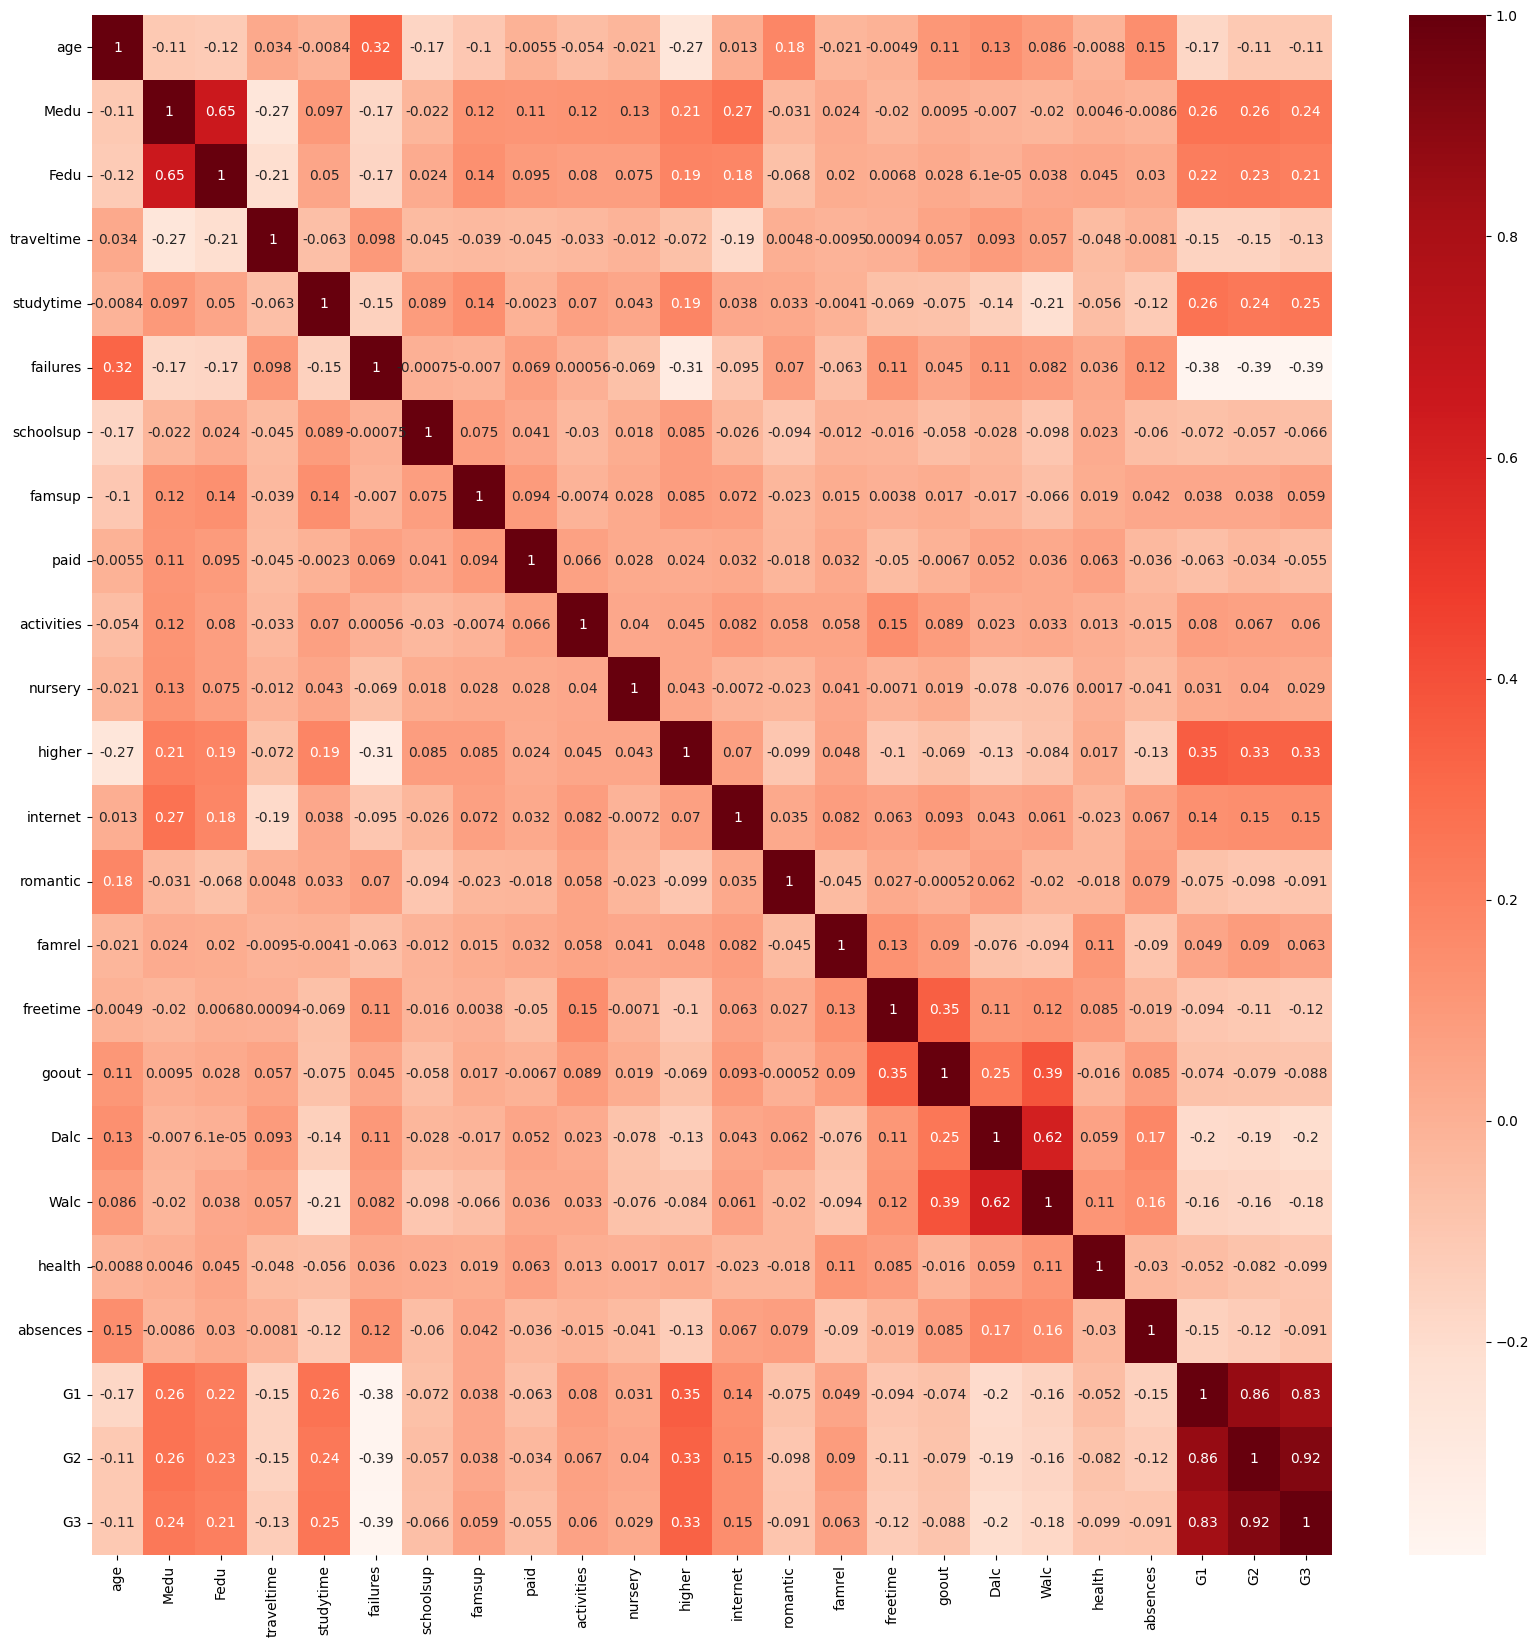

In [182]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap="Reds")

<h4>Observations from heatmap<br>
- G2 and G3 have the highest correlatin factor of 0.92<br>
- G1 and G2, G1 and G3 have a good amount correlation with 0.86 and 0.83<br>
- Medu and Fedu are also co-related with each other with correlation factor of 0.65<br>
- Walc and Dalc are also co-related with each other with correlation factor of 0.62

In [183]:
#scatterplot of G1 vs G2 and G1 vs G3

In [184]:
px.scatter(df,x="G1",y="G2",title='G1 vs G2')

In [185]:
px.scatter(df,x="G1",y="G3",title='G1 vs G3')

<h3> From the scatterplot of G1 vs G2 and G1 vs G3 linear relationship between G1 and G2 ,G1 and G3 is observed.<br>
from this we can infer that person who scores good in G1 also scores good in G2 and G3

In [186]:
#barplot of students grade vs age

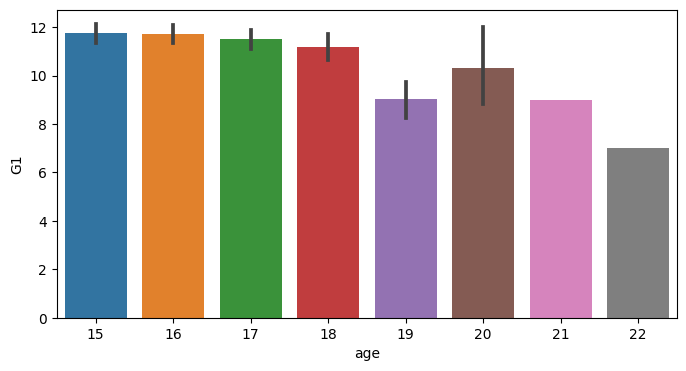

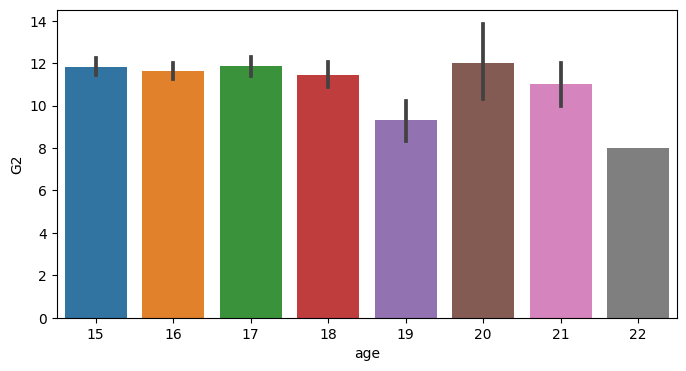

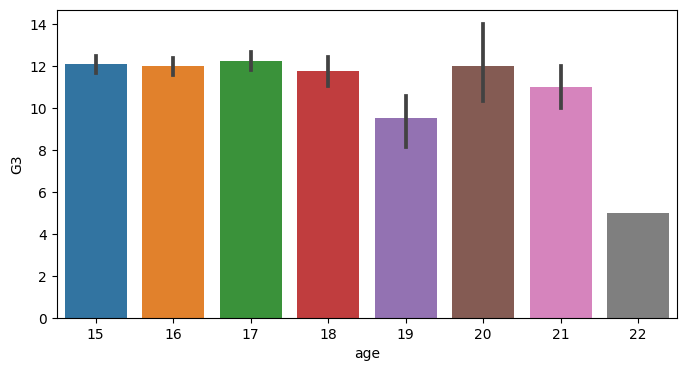

In [187]:
lst=['G1','G2','G3']
for item in lst:
    plt.figure(figsize=(8,4))
    sns.barplot(x=df['age'],y=df[item])
    plt.show()

<h4> from the barplot we can infer that with age students interest in studies decreases

In [188]:
#barplot of students grade vs travel time

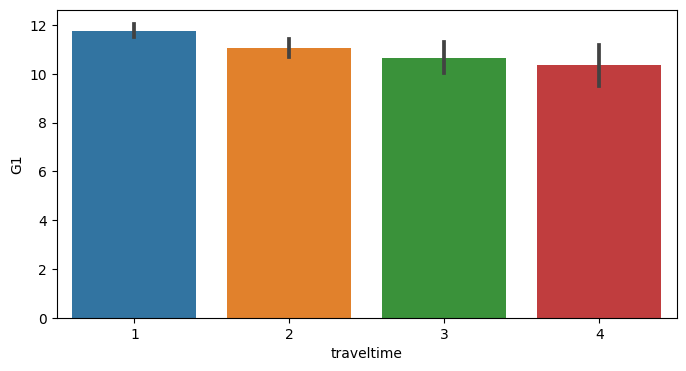

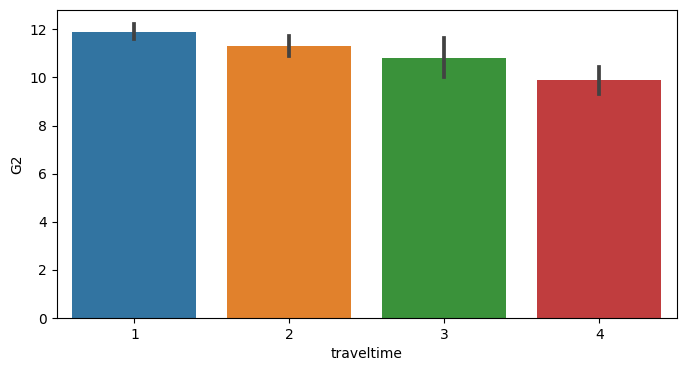

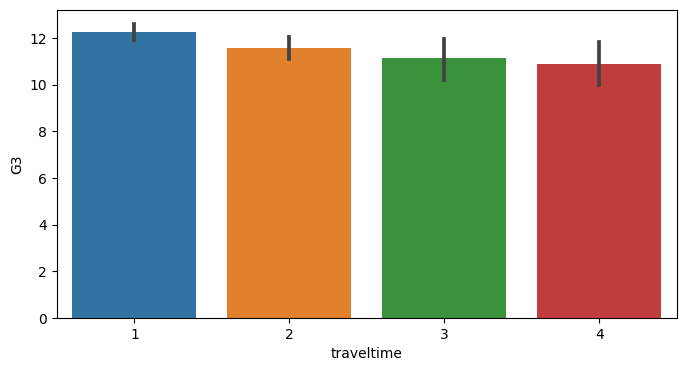

In [189]:
lst=['G1','G2','G3']
for item in lst:
    plt.figure(figsize=(8,4))
    sns.barplot(x=df['traveltime'],y=df[item])
    plt.show()

<h4> From the barplot we can infer that students who often travel more have slight less grade

In [190]:
#barplot of students grade vs absences to the class

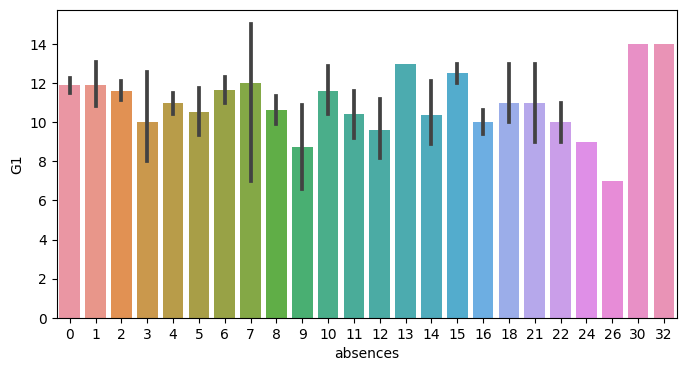

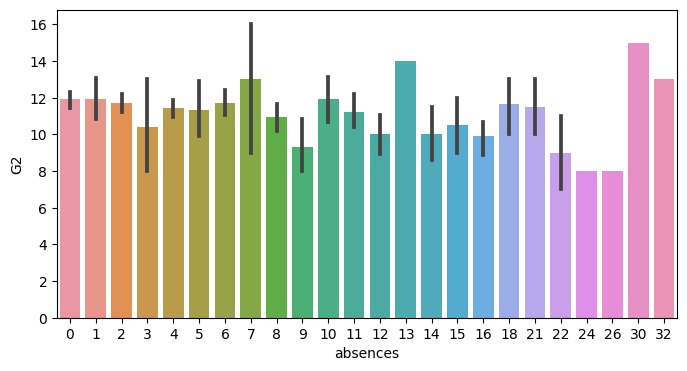

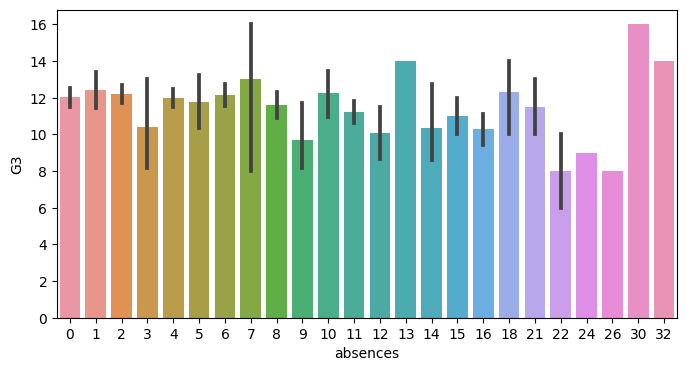

In [191]:
lst=['G1','G2','G3']
for item in lst:
    plt.figure(figsize=(8,4))
    sns.barplot(x=df['absences'],y=df[item])
    plt.show()

<h4> From the barplot of student grade vs Number of class student is absent we can infer that being absent to the class
doesnot affect students performace

<h4 style='color:brown'>Some myths about students performance<br>
    1.having internet access at home result in good grades<br>
    2.Study more time for good grades<br>
    3.being romantic results in good grades<br>
    4.Attending all classes result in good grades <br>
    let's checkit out

In [192]:
#1

In [193]:
internet_students=df.loc[df.internet==1]
internet_students_scores=internet_students.G1
internet_students_scores_mean=internet_students_scores.mean()
internet_students_scores_mean

11.610441767068274

In [194]:
non_internet_students=df.loc[df.internet==0]
non_internet_students_scores=non_internet_students.G1
non_internet_students_scores_mean=non_internet_students_scores.mean()
non_internet_students_scores_mean

10.701986754966887

C:\Users\rajes\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\rajes\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



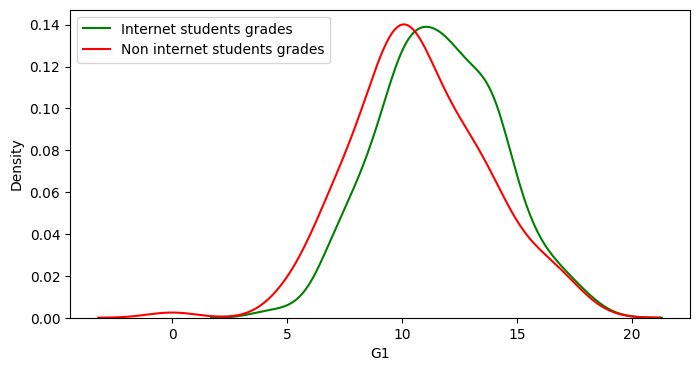

In [195]:
plt.figure(figsize=(8,4))
sns.distplot(internet_students_scores,color='green',hist=False,label='Internet students grades')
sns.distplot(non_internet_students_scores,color='red',hist=False,label='Non internet students grades')
plt.legend()
plt.show()

In [196]:
#calculating the t-value and p-value

In [197]:
import scipy.stats as stats

In [198]:
alpha=0.05
t_value, p_value = stats.ttest_ind(internet_students_scores,non_internet_students_scores)
print("t-value = ",t_value, ", p-value = ", p_value)

t-value =  3.5946665162831564 , p-value =  0.0003495181259142716


<h4> Conclusion :Since p-value is very less than alpha reject null hypothesis 'That having internet result in good grades'.
    Therefore having internet doesnot result in good grades

In [199]:
#2

In [200]:
px.box(df,x='studytime',y='G1')

In [201]:
ctab=pd.crosstab(index=df.G1,columns=df.studytime)
ctab

studytime,1,2,3,4
G1,,,,
0,0,1,0,0
4,1,1,0,0
5,2,2,0,1
6,6,3,0,0
7,16,14,3,0
8,19,21,2,0
9,35,25,4,1
10,34,40,14,7
11,29,42,16,4


In [202]:
ctab.columns

Int64Index([1, 2, 3, 4], dtype='int64', name='studytime')

In [203]:
px.scatter(df,x='G1',y="studytime",)

<h4> From the pandas crosstab and the scatter plot we can infer that grade of the student depend on his studytime

In [204]:
#3

In [213]:
romantic_students=df.loc[df.romantic==1]
romantic_students_scores = romantic_students.G1
romantic_students_mean = romantic_stu_scores.mean()
romantic_students_mean

11.129707112970712

In [214]:
non_romantic_students = df.loc[df.romantic == 0]
non_romantic_students_scores = non_romantic_students.G1
non_romantic_students_mean = non_romantic_students_scores.mean()
non_romantic_students_mean

11.55609756097561

C:\Users\rajes\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\rajes\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



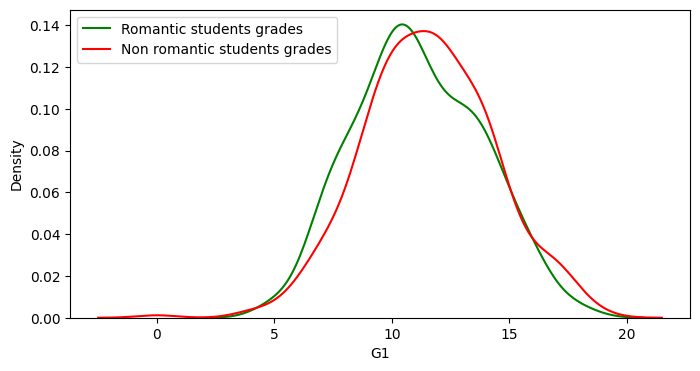

In [216]:
plt.figure(figsize=(8,4))
sns.distplot(romantic_students_scores,color='green',hist=False,label='Romantic students grades')
sns.distplot(non_romantic_students_scores,color='red',hist=False,label='Non romantic students grades')
plt.legend()
plt.show()

In [218]:
#calculating the p-value and t-value
alpha=0.05
t_value, p_value = stats.ttest_ind(romantic_students_scores,non_romantic_students_scores)
print("t-value = ",t_value, ", p-value = ", p_value)

t-value =  -1.9124071324003693 , p-value =  0.05626526699291734


<h4>Conclusion:Since p value 0.05626526699291734 is greater than alpha 0.05  <br>
Failed to reject null hypothesis that Being romantic results in good grades.Therefore we can infer<br>
that being romantic result in good grades

<h2 style="color:green"> Conclusion of Data analysis :<br>
    1.Dataset is clean without null values<br>
    2.There are no duplicate data<br>
    3.Few outliers are observed in the data<br>
    4.According to the data<br>
       a.Having internet doesnot result in good grades<br>
       b.Study more time results in good grades<br>
       c.Being romantic results in good grades